<h3>PANDAS and NUMPY

In [1]:
import pandas as pd
import numpy as np

In [2]:
covid_df=pd.read_csv('italy-covid-daywise.csv')

In [3]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [4]:
analysis_summary=covid_df.describe()
print(analysis_summary)

         new_cases  new_deaths     new_tests
count   248.000000  248.000000    135.000000
mean   1094.818548  143.133065  31699.674074
std    1554.508002  227.105538  11622.209757
min    -148.000000  -31.000000   7841.000000
25%     123.000000    3.000000  25259.000000
50%     342.000000   17.000000  29545.000000
75%    1371.750000  175.250000  37711.000000
max    6557.000000  971.000000  95273.000000


In [5]:
covid_df.isnull().sum()

date            0
new_cases       0
new_deaths      0
new_tests     113
dtype: int64

In [6]:
null_value_columns=covid_df.columns[covid_df.isnull().any()].to_list()
print("Columns with null values:")
print(null_value_columns)

Columns with null values:
['new_tests']


In [7]:
#replacing nans with 0
covid_df.fillna(0,inplace=True)

In [8]:
covid_df['date']=pd.to_datetime(covid_df['date'])

In [9]:
covid_df.dtypes

date          datetime64[ns]
new_cases            float64
new_deaths           float64
new_tests            float64
dtype: object

In [10]:
covid_df['year']=pd.DatetimeIndex(covid_df.date).year
covid_df['month']=pd.DatetimeIndex(covid_df.date).month
covid_df['day']=pd.DatetimeIndex(covid_df.date).day
covid_df['weekday']=pd.DatetimeIndex(covid_df.date).weekday


In [11]:
covid_df['daily_change_case']=covid_df['new_cases'].diff()

In [12]:
covid_df['daily_change_deaths']=covid_df['new_deaths'].diff()

In [13]:
covid_df['total_cases']=covid_df.new_cases.cumsum()
covid_df['total_deaths']=covid_df.new_deaths.cumsum()

In [14]:
col_list=covid_df.columns.to_list()
col_list.insert(2,col_list.pop(col_list.index('total_cases')))
col_list.insert(3,col_list.pop(col_list.index('daily_change_case')))
col_list.insert(5,col_list.pop(col_list.index('total_deaths')))
col_list.insert(6,col_list.pop(col_list.index('daily_change_deaths')))
covid_df=covid_df[col_list]

In [15]:
covid_df

,date,new_cases,total_cases,daily_change_case,new_deaths,total_deaths,daily_change_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,2019,12,31,1
1,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,1,2
2,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,2,3
3,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,3,4
4,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,266853.0,-16.0,1.0,35473.0,-8.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,268218.0,-79.0,4.0,35477.0,3.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,269214.0,-369.0,6.0,35483.0,2.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,270189.0,-21.0,8.0,35491.0,2.0,0.0,2020,9,2,2


In [16]:
yearly_analysis=covid_df.groupby('year')[['new_cases','new_deaths','new_tests']].agg(['sum','mean'])
print("\tANALYSIS ON BASIS OF YEARS:>\n")
print(yearly_analysis)

	ANALYSIS ON BASIS OF YEARS:>

     new_cases              new_deaths              new_tests              
           sum         mean        sum        mean        sum          mean
year                                                                       
2019       0.0     0.000000        0.0    0.000000        0.0      0.000000
2020  271515.0  1099.251012    35497.0  143.712551  4279456.0  17325.732794


In [17]:
monthly_analysis=covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].agg(['sum','mean'])
print("\tANALYSIS ON BASIS OF months:>\n")
print(monthly_analysis)

	ANALYSIS ON BASIS OF months:>

      new_cases              new_deaths              new_tests              
            sum         mean        sum        mean        sum          mean
month                                                                       
1           3.0     0.096774        0.0    0.000000        0.0      0.000000
2         885.0    30.517241       21.0    0.724138        0.0      0.000000
3      100851.0  3253.258065    11570.0  373.225806        0.0      0.000000
4      101852.0  3395.066667    16091.0  536.366667   419591.0  13986.366667
5       29073.0   937.838710     5658.0  182.516129  1078720.0  34797.419355
6        7772.0   259.066667     1404.0   46.800000   830354.0  27678.466667
7        6722.0   216.838710      388.0   12.516129   797692.0  25732.000000
8       21060.0   679.354839      345.0   11.129032  1098704.0  35442.064516
9        3297.0  1099.000000       20.0    6.666667    54395.0  18131.666667
12          0.0     0.000000        0.0    0

In [18]:
# Perform weekday analysis
weekday_analysis = covid_df.groupby('weekday')[['new_cases', 'new_deaths', 'new_tests']].agg(['sum', 'mean'])

# Flatten the column names
weekday_analysis.columns = ['_'.join(col).strip() for col in weekday_analysis.columns.values]

# Reset index to make 'weekday' a regular column
weekday_analysis = weekday_analysis.reset_index()

# Map weekday numbers to day names
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday_analysis['day_name'] = weekday_analysis['weekday'].map(weekday_mapping)

# Reorder columns to place 'day_name' at the beginning
weekday_analysis = weekday_analysis[['day_name', 'weekday', 'new_cases_sum', 'new_cases_mean',
                                     'new_deaths_sum', 'new_deaths_mean',
                                     'new_tests_sum', 'new_tests_mean']]
weekday_analysis = weekday_analysis.drop(columns=['weekday'])
# Print the analysis
print("\tANALYSIS ON BASIS OF WEEKDAYS:>\n")
print(weekday_analysis)

	ANALYSIS ON BASIS OF WEEKDAYS:>

    day_name  new_cases_sum  new_cases_mean  new_deaths_sum  new_deaths_mean  \
0     Monday        38820.0     1109.142857          4368.0       124.800000   
1    Tuesday        33071.0      918.638889          4678.0       129.944444   
2  Wednesday        33383.0      927.305556          5211.0       144.750000   
3   Thursday        39444.0     1095.666667          5093.0       141.472222   
4     Friday        41640.0     1189.714286          5071.0       144.885714   
5   Saturday        41503.0     1185.800000          5495.0       157.000000   
6     Sunday        43654.0     1247.257143          5581.0       159.457143   

   new_tests_sum  new_tests_mean  
0       396534.0    11329.542857  
1       623338.0    17314.944444  
2       658639.0    18295.527778  
3       655283.0    18202.305556  
4       745288.0    21293.942857  
5       657200.0    18777.142857  
6       543174.0    15519.257143  


In [19]:
from urllib.request import urlretrieve
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x16dc2aad880>)

In [20]:
location_df=pd.read_csv('locations.csv')

In [21]:
location_df[location_df.location=="Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [22]:
covid_df['location']="Italy"

C:\Users\SL LAPTOP\AppData\Local\Temp\ipykernel_33656\2535136314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['location']="Italy"


In [23]:
merged_df=covid_df.merge(location_df,on="location")

In [24]:
merged_df

,date,new_cases,total_cases,daily_change_case,new_deaths,total_deaths,daily_change_deaths,new_tests,year,month,day,weekday,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,2019,12,31,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,1,2,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,2,3,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,3,4,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,4,5,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,266853.0,-16.0,1.0,35473.0,-8.0,53541.0,2020,8,30,6,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,268218.0,-79.0,4.0,35477.0,3.0,42583.0,2020,8,31,0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,269214.0,-369.0,6.0,35483.0,2.0,54395.0,2020,9,1,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,270189.0,-21.0,8.0,35491.0,2.0,0.0,2020,9,2,2,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [25]:
result_df=merged_df[[
    'date',
    'new_cases',
    'total_cases',
    'daily_change_case',
    'new_deaths',
    'total_deaths',
    'daily_change_deaths',
    'new_tests',
    'location',
    'continent',
    'population'
]]

In [26]:
result_df.to_csv("results.csv",index=False)

In [27]:
result_df

,date,new_cases,total_cases,daily_change_case,new_deaths,total_deaths,daily_change_deaths,new_tests,location,continent,population
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,Italy,Europe,60461828.0
1,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Italy,Europe,60461828.0
2,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Italy,Europe,60461828.0
3,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Italy,Europe,60461828.0
4,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Italy,Europe,60461828.0
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,266853.0,-16.0,1.0,35473.0,-8.0,53541.0,Italy,Europe,60461828.0
244,2020-08-31,1365.0,268218.0,-79.0,4.0,35477.0,3.0,42583.0,Italy,Europe,60461828.0
245,2020-09-01,996.0,269214.0,-369.0,6.0,35483.0,2.0,54395.0,Italy,Europe,60461828.0
246,2020-09-02,975.0,270189.0,-21.0,8.0,35491.0,2.0,0.0,Italy,Europe,60461828.0


In [28]:
import matplotlib.pyplot as plt
plt.style.available
plt.style.use('seaborn-v0_8-whitegrid')

<Axes: title={'center': 'new cases'}>

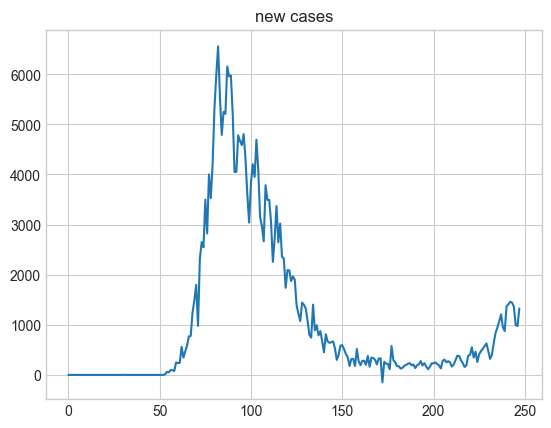

In [29]:

# result_df.set_index('date', inplace=True)
result_df.new_cases.plot(title="new cases")

<Axes: title={'center': 'hehe'}>

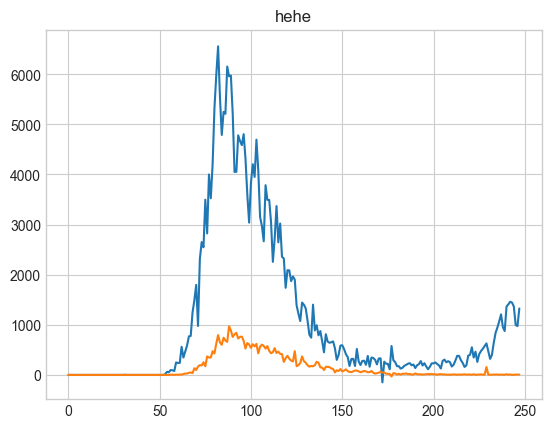

In [30]:
result_df.new_cases.plot()
result_df.new_deaths.plot(title="hehe")

<Axes: title={'center': 'hehe'}>

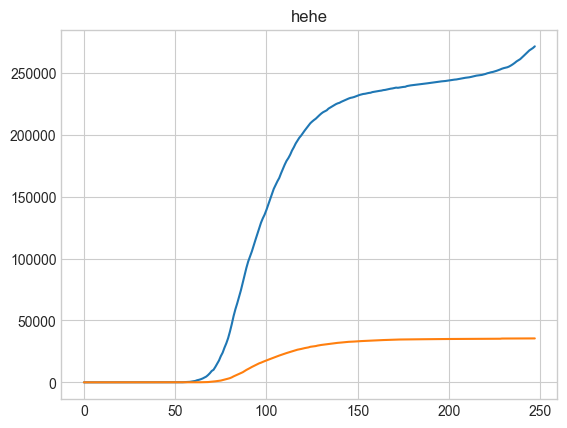

In [31]:
result_df.total_cases.plot()
result_df.total_deaths.plot(title="hehe")

<Axes: >

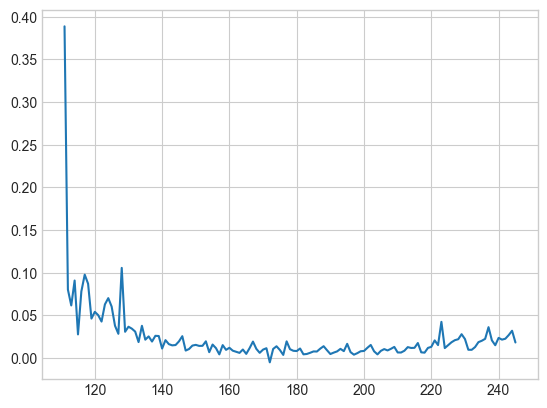

In [32]:
positive_result=result_df.new_cases/result_df.new_tests
positive_result.plot()

<Axes: title={'center': 'monthly analysis'}, ylabel='month'>

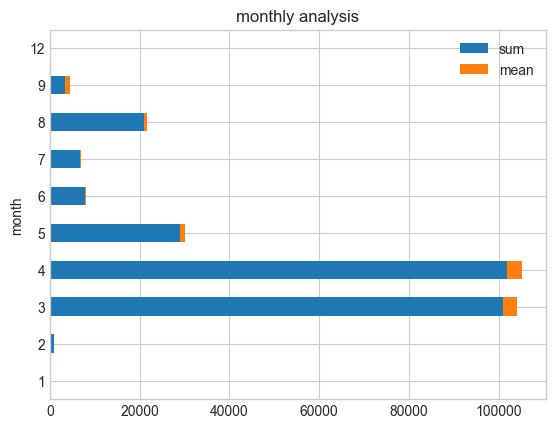

In [33]:
monthly_analysis.new_cases.plot.barh(stacked=True,title='monthly analysis')

array([<Axes: xlabel='date', ylabel='hell'>], dtype=object)

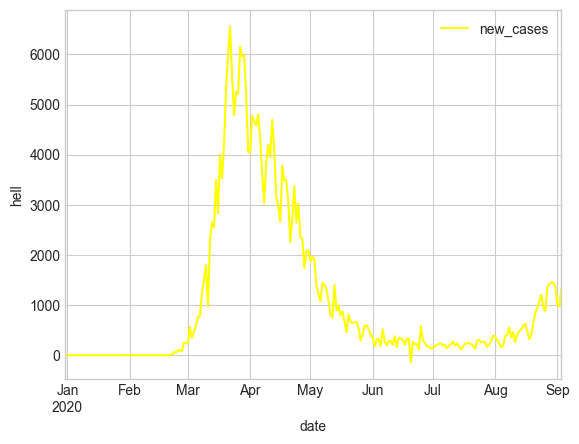

In [34]:
covid_df.plot(x='date', color="yellow",y='new_cases',ylabel="hell", kind='line',subplots=True)


<Axes: xlabel='new_cases', ylabel='date'>

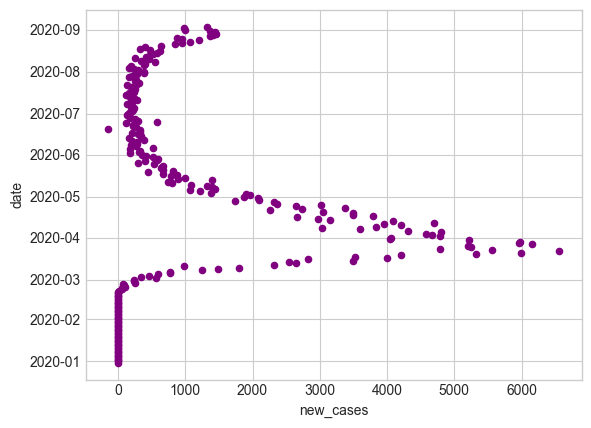

In [35]:
covid_df.plot.scatter(y='date',x='new_cases',s=20,color="purple")

<Axes: ylabel='Frequency'>

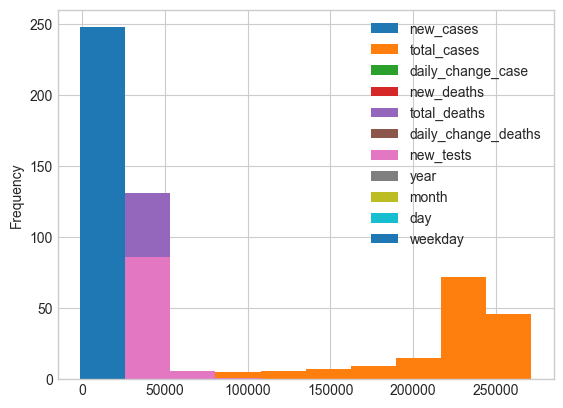

In [36]:
covid_df.plot.hist(x="date")

<Axes: >

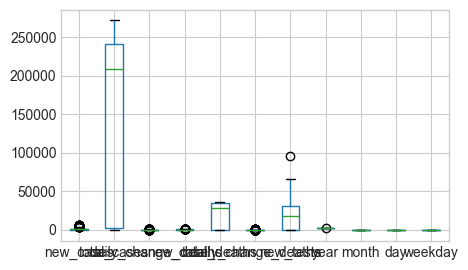

In [37]:
covid_df.boxplot(figsize=(5,3))

In [38]:
# covid_df.plot.area()

In [39]:


# covid_df.plot.area()
# plt.show()


In [40]:
# covid_df.plot.pie(x="new_cases",y="date")

In [41]:
covid_df.dtypes

date                   datetime64[ns]
new_cases                     float64
total_cases                   float64
daily_change_case             float64
new_deaths                    float64
total_deaths                  float64
daily_change_deaths           float64
new_tests                     float64
year                            int32
month                           int32
day                             int32
weekday                         int32
location                       object
dtype: object

In [42]:
# covid_df.plot.pie(y='new_cases')

In [43]:
cus_df=pd.read_csv("C:/Users/SL LAPTOP/Downloads/customers-1000.csv")

In [44]:
cus_df.head()

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,dE014d010c7ab0c,Andrew,Goodman,Stewart-Flynn,Rowlandberg,Macao,846-790-4623x4715,(422)787-2331x71127,marieyates@gomez-spencer.info,7/26/2021,http://www.shea.biz/
1,2,2B54172c8b65eC3,Alvin,Lane,"Terry, Proctor and Lawrence",Bethside,Papua New Guinea,124-597-8652x05682,321.441.0588x6218,alexandra86@mccoy.com,6/24/2021,http://www.pena-cole.com/
2,3,d794Dd48988d2ac,Jenna,Harding,Bailey Group,Moniquemouth,China,(335)987-3085x3780,001-680-204-8312,justincurtis@pierce.org,4/5/2020,http://www.booth-reese.biz/
3,4,3b3Aa4aCc68f3Be,Fernando,Ford,Moss-Maxwell,Leeborough,Macao,(047)752-3122,048.779.5035x9122,adeleon@hubbard.org,11/29/2020,http://www.hebert.com/
4,5,D60df62ad2ae41E,Kara,Woods,Mccarthy-Kelley,Port Jacksonland,Nepal,+1-360-693-4419x19272,163-627-2565,jesus90@roberson.info,4/22/2022,http://merritt.com/


In [45]:
cus_df.isnull().sum()

Index                0
Customer Id          0
First Name           0
Last Name            0
Company              0
City                 0
Country              0
Phone 1              0
Phone 2              0
Email                0
Subscription Date    0
Website              0
dtype: int64

In [46]:
df=pd.read_csv("C:/Users/SL LAPTOP/Downloads/raw_data_unmodified.csv")

In [47]:
cus_df.duplicated().any()

False

In [48]:
pd.set_option('display.max_rows',None)

In [49]:
cus_df.index=range(1,len(cus_df)+1)
cus_df.drop("Index",axis=1,inplace=True)

In [50]:
import re

match=re.findall(r"x[0-9]{1,}",str(cus_df['Phone 1']))
match
for matc in match:
    cus_df['Phone 1']=cus_df['Phone 1'].str.replace(matc,"")
match1=re.findall(r"x[0-9]{1,}",str(cus_df['Phone 2']))
for matc1 in match1:
    cus_df['Phone 2']=cus_df['Phone 2'].str.replace(matc1,"")
# len(match)

In [51]:

cus_df['Phone 1']=cus_df['Phone 1'].str.replace("(","")
cus_df['Phone 1']=cus_df['Phone 1'].str.replace(")","")
cus_df['Phone 1']=cus_df['Phone 1'].str.replace("+","")
cus_df['Phone 1']=cus_df['Phone 1'].str.replace(".","")
cus_df['Phone 1']=cus_df['Phone 1'].str.replace("-","")
cus_df['Phone 2']=cus_df['Phone 2'].str.replace(")","")
cus_df['Phone 2']=cus_df['Phone 2'].str.replace("(","")
cus_df['Phone 2']=cus_df['Phone 2'].str.replace("+","")
cus_df['Phone 2']=cus_df['Phone 2'].str.replace(".","")
cus_df['Phone 2']=cus_df['Phone 2'].str.replace("-","")
cus_df['Phone 1'] = cus_df['Phone 1'].apply(lambda x: '0' if len(x) < 10 else x)
cus_df['Phone 2'] = cus_df['Phone 2'].apply(lambda x: '0' if len(x) < 10 else x)
cus_df['Phone 2'] = cus_df['Phone 2'].apply(lambda x: f"{x[-10:-7]}-{x[-7:-4]}-{x[-4:]}" if len(x) == 10 else x)
cus_df['Phone 2'] = cus_df['Phone 2'].apply(lambda x: f"{x[0]}-{x[-10:-7]}-{x[-7:-4]}-{x[-4:]}" if len(x) == 11 else x)
cus_df['Phone 2'] = cus_df['Phone 2'].apply(lambda x: f"{x[-13:-11]}-{x[-10:-7]}-{x[-7:-4]}-{x[-4:]}" if len(x) == 13 else x)
cus_df['Phone 2'] = cus_df['Phone 2'].apply(lambda x: f"{x[-13:-11]}-{x[-10:-7]}-{x[-7:-4]}-{x[-4:]}" if len(x) == 13 else x)
cus_df['Phone 2'] = cus_df['Phone 2'].apply(lambda x: f"{x[-13:-11]}-{x[-10:-7]}-{x[-7:-4]}-{x[-4:]}" if len(x) == 13 else x)


cus_df['Phone 1'] = cus_df['Phone 1'].apply(lambda x: f"{x[-10:-7]}-{x[-7:-4]}-{x[-4:]}" if len(x) == 10 else x)
cus_df['Phone 1'] = cus_df['Phone 1'].apply(lambda x: f"{x[0]}-{x[-10:-7]}-{x[-7:-4]}-{x[-4:]}" if len(x) == 11 else x)
cus_df['Phone 1'] = cus_df['Phone 1'].apply(lambda x: f"{x[-13:-11]}-{x[-10:-7]}-{x[-7:-4]}-{x[-4:]}" if len(x) == 13 else x)

# cus_df['Phone 2'] = cus_df['Phone 2'].apply(lambda x: f"{x[-12:-11]}-{x[-10:-7]}-{x[-7:-4]}-{x[-4:]}" if len(x)>11 else x)
# cus_df['Phone 2'] = cus_df['Phone 2'].apply(lambda x:  f"{x[:3]}-{x[:-11]}-{x[-10:-8]}-{x[-7:-5]}-{x[-4:-1]}" if len(x) >= 10 else x)

# cus_df['Phone 2'] = cus_df['Phone 2'].apply(lambda x: 
#     f"{x[:3]}-{x[3:6]}-{x[6:]}" if len(x) == 10 else
#     f"{x[0]}-{x[1:4]}-{x[4:7]}-{x[7:]}" if len(x) == 11 else
#     f"{x[:3]}-{x[3:6]}-{x[6:9]}-{x[9:]}" if len(x) == 12 else
#     f"{x[:3]}-{x[:-11]}-{x[-10:-8]}-{x[-7:-5]}-{x[-4:-1]}" if len(x) > 12 else x
# )
# cus_df['Phone 2'] = cus_df['Phone 2'].apply(lambda x: f"{x[:3]}-{x[3:6]}-{x[6:]}" if len(x) == 10 else f"{x[0]}-{x[1:4]}-{x[4:7]}-{x[7:]}" if len(x) == 11 else x)

# cus_df['Phone 2'] = cus_df['Phone 2'].apply(lambda x: f"{x[0]}-{x[1:4]}-{x[4:7]}-{x[7:]}" if len(x) == 11 else x)

# cus_df['Phone 1'] = cus_df['Phone 1'].apply(lambda x: f"{cus_df['Phone 1'][:3]}-{cus_df['Phone 1'][3:6]}-{cus_df['Phone 1'][6:]}" if len(x) == 10 else x)


In [52]:
# cus_df

In [53]:
phone_lengths = [len(str(phone)) for phone in cus_df['Phone 1']]
max(phone_lengths)
# # Print lengths
# for length in phone_lengths:
#     print(length)

15

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

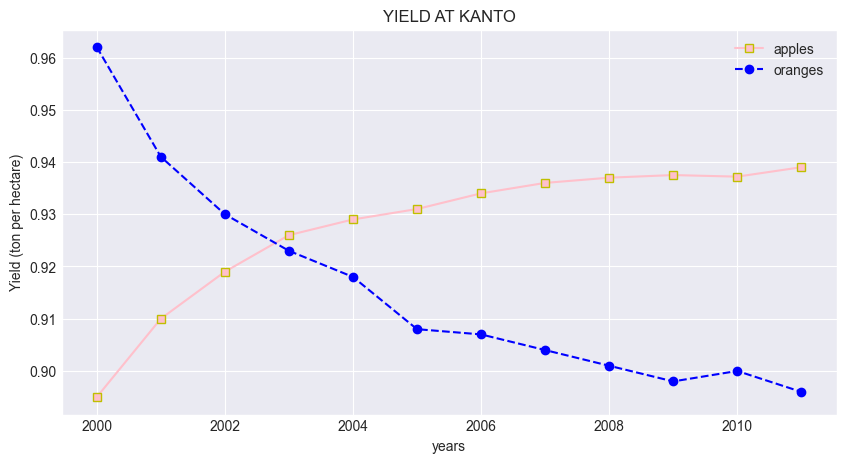

<Figure size 500x300 with 0 Axes>

In [55]:
years = range(2000, 2012)
apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931, 0.934, 0.936, 0.937, 0.9375, 0.9372, 0.939]
oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908, 0.907, 0.904, 0.901, 0.898, 0.9, 0.896, ]

sns.set_style("darkgrid");
plt.plot(years,apples,marker='s',c='pink',ls='-',mec='y')
plt.plot(years,oranges,marker='o',c='b',ls='--')
plt.xlabel("years")
plt.ylabel("Yield (ton per hectare)")
plt.title("YIELD AT KANTO");
plt.legend(['apples','oranges'])
plt.figure(figsize=(5,3));
# plt.plot()

In [56]:
flower=sns.load_dataset('iris')

In [57]:
flower

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [58]:
flower.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

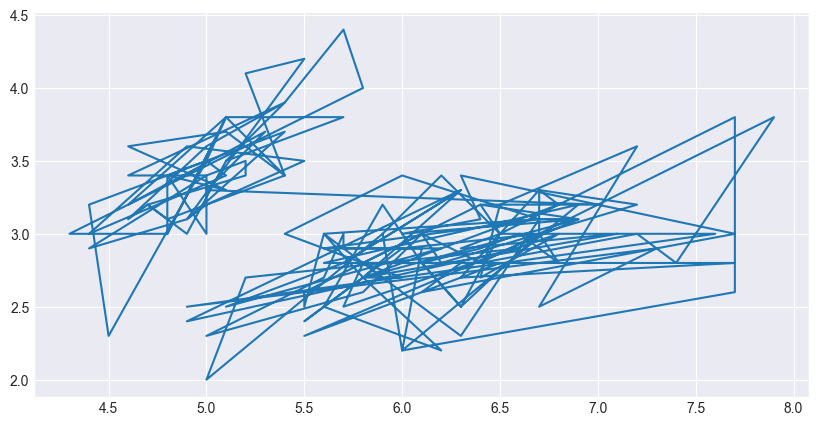

In [59]:
plt.plot(flower['sepal_length'],flower['sepal_width'])

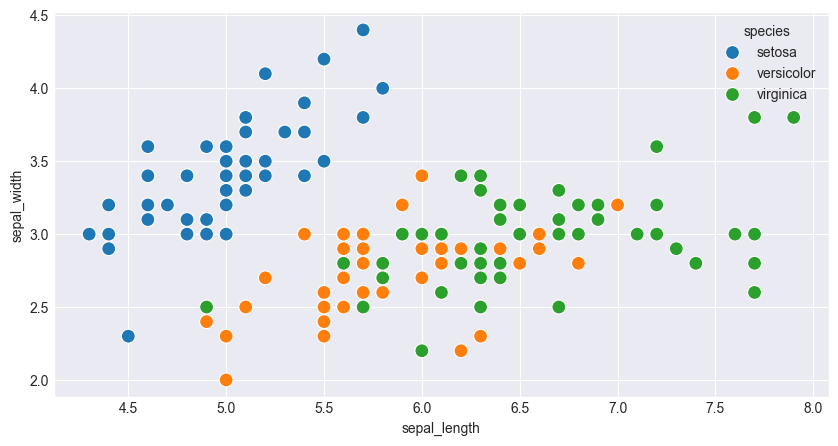

In [60]:
sns.scatterplot(x=flower.sepal_length, y=flower.sepal_width,hue=flower.species,data=flower, s=100);

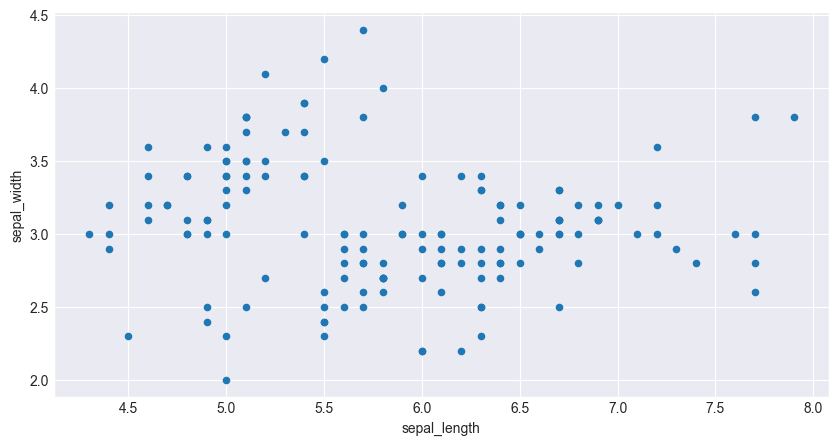

In [61]:
flower.plot.scatter(x='sepal_length',y='sepal_width');

In [62]:
plt.hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width],bins=np.arange(2, 5, 0.25))

NameError: name 'setosa_df' is not defined

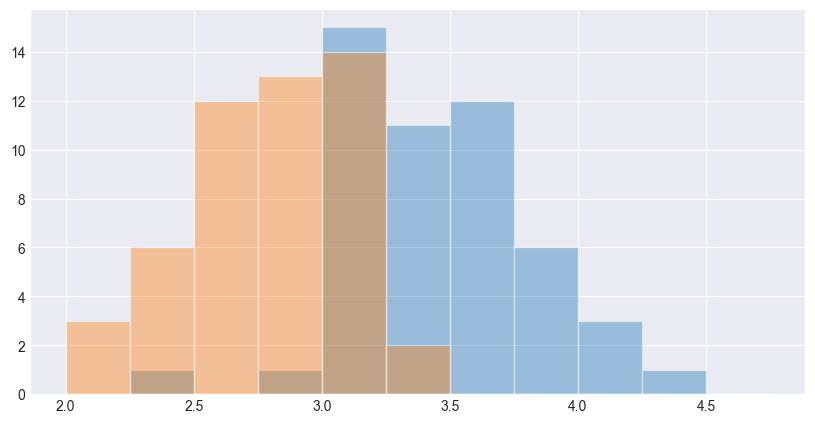

In [63]:
setosa_df = flower[flower.species == 'setosa']
versicolor_df = flower[flower.species == 'versicolor']
virginica_df = flower[flower.species == 'virginica']

plt.hist(setosa_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));
plt.hist(versicolor_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));

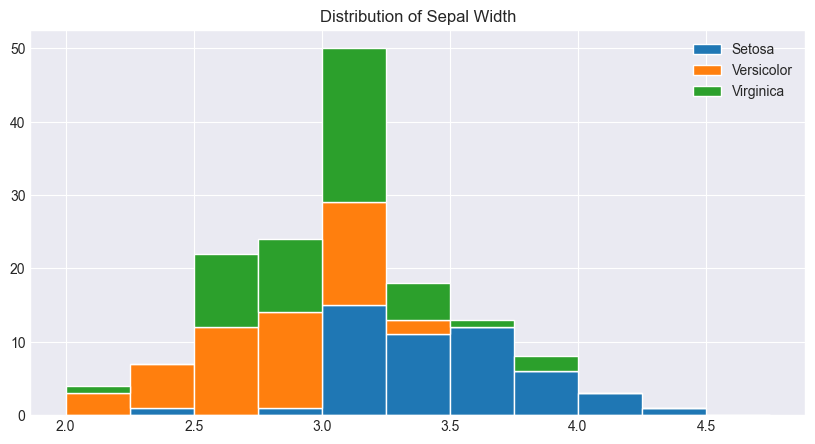

In [64]:
plt.title('Distribution of Sepal Width')

plt.hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);

plt.legend(['Setosa', 'Versicolor', 'Virginica']);

In [65]:
tips_df = sns.load_dataset("tips");

In [66]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [67]:
df.describe()

,num_critic_for_reviews,duration,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
count,14.000000,11.000000,14.000000,14.000000,1.400000e+01,1.300000e+01,12.000000,9.000000,14.000000,1.400000e+01,14.000000,13.000000,14.000000,7.000000
mean,506.142857,150.727273,5866.142857,18206.428571,3.335836e+08,4.621578e+05,44773.583333,2.111111,1620.071429,2.462643e+08,2010.500000,8455.846154,7.171429,2011.142857
std,169.069789,21.679903,8289.592695,13905.214361,1.720674e+08,2.687059e+05,37290.813335,1.269296,866.672102,2.426823e+07,3.632122,8541.019541,0.673028,3.976119
min,302.000000,106.000000,161.000000,451.000000,7.305868e+07,2.122040e+05,1873.000000,1.000000,387.000000,2.000000e+08,2006.000000,393.000000,6.100000,2007.000000
25%,379.250000,141.000000,611.250000,3500.000000,2.002574e+08,2.948100e+05,9983.500000,1.000000,1024.750000,2.390000e+08,2007.250000,632.000000,6.725000,2008.000000
50%,448.000000,151.000000,1000.000000,21000.000000,3.198266e+08,3.830560e+05,47202.500000,2.000000,1240.500000,2.500000e+08,2009.500000,5000.000000,7.200000,2009.000000
75%,635.000000,162.500000,8500.000000,26000.000000,4.418561e+08,4.712200e+05,67064.750000,3.000000,2250.750000,2.560000e+08,2014.250000,11000.000000,7.500000,2015.000000
max,813.000000,183.000000,23000.000000,40000.000000,7.605058e+08,1.144337e+06,106759.000000,4.000000,3054.000000,3.000000e+08,2016.000000,23000.000000,8.500000,2016.000000


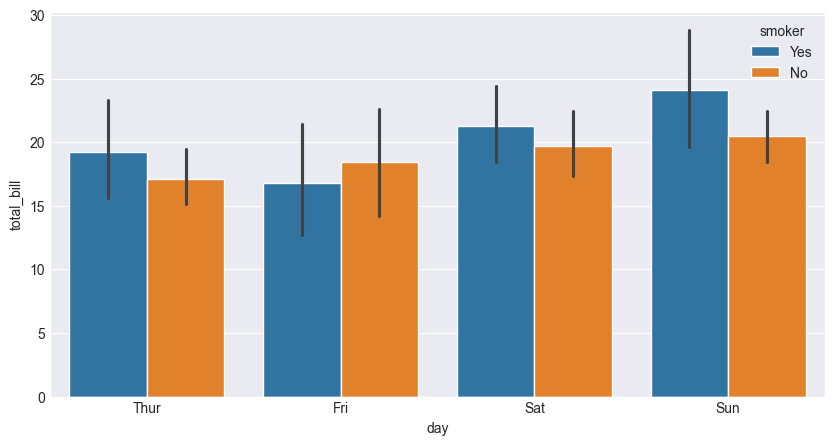

In [68]:
sns.barplot(x='day', y='total_bill',hue="smoker", data=tips_df);

In [69]:
flights_df = sns.load_dataset("flights")
flights_df.pivot("month", "year", "passengers")
flights_df

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [70]:
import seaborn as sns

# Load the dataset
flights_df = sns.load_dataset("flights")

# Pivot the DataFrame
flights_pivoted = flights_df.pivot(index="month", columns="year", values="passengers")

# Display the pivoted DataFrame
print(flights_pivoted)


year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   31

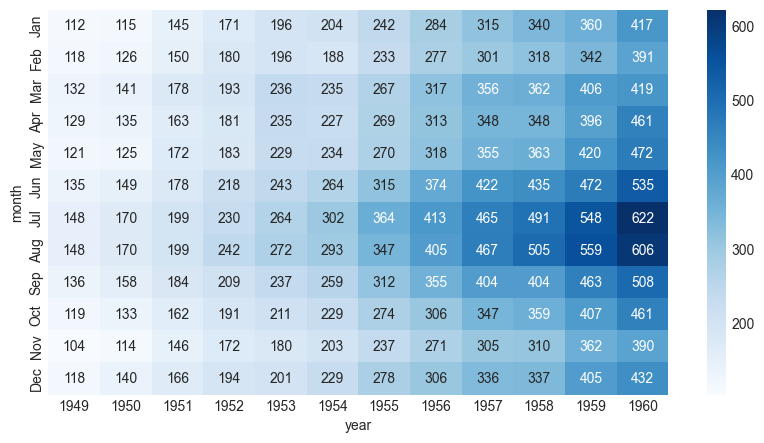

In [98]:
# monthly_analysis.columns = ['_'.join(col).strip() for col in monthly_analysis.columns.values]
# print(monthly_analysis)
# flights_pivoted.plot.area();
sns.heatmap(flights_pivoted,annot=True, fmt="d",cmap="Blues");

In [100]:
from urllib.request import urlretrieve

In [106]:
# # urlretrieve('https://i.imgur.com/SkPbq.jpg', 'chart.jpg
# import requests

# url = 'https://i.imgur.com/SkPbq.jpg'
# filename = 'chart.jpg'

# try:
#     response = requests.get(url)
#     response.raise_for_status()  # Check if the request was successful
#     with open(filename, 'wb') as f:
#         f.write(response.content)
#     print(f"Image successfully downloaded as {filename}")
# except requests.exceptions.HTTPError as err:
#     print(f"HTTP error occurred: {err}")
# except Exception as err:
#     print(f"An error occurred: {err}")


In [107]:
from PIL import Image
img = Image.open("C:/Users/SL LAPTOP/PycharmProjects/zahraProject/image.jpg")

In [108]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [109]:
img_array = np.array(img)

In [112]:
img_array.shape

(358, 626, 3)

<Figure size 300x100 with 0 Axes>

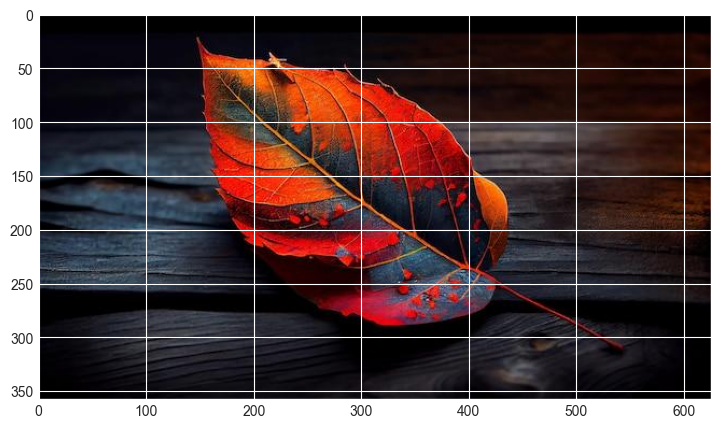

<Figure size 300x100 with 0 Axes>

In [118]:
plt.imshow(img)
plt.figure(figsize=(3,1))

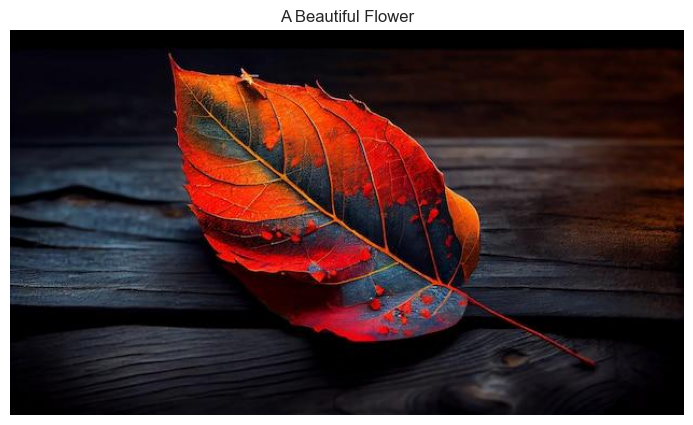

In [123]:
plt.grid(False)
plt.title('A Beautiful Flower')
plt.axis('off')
plt.imshow(img)

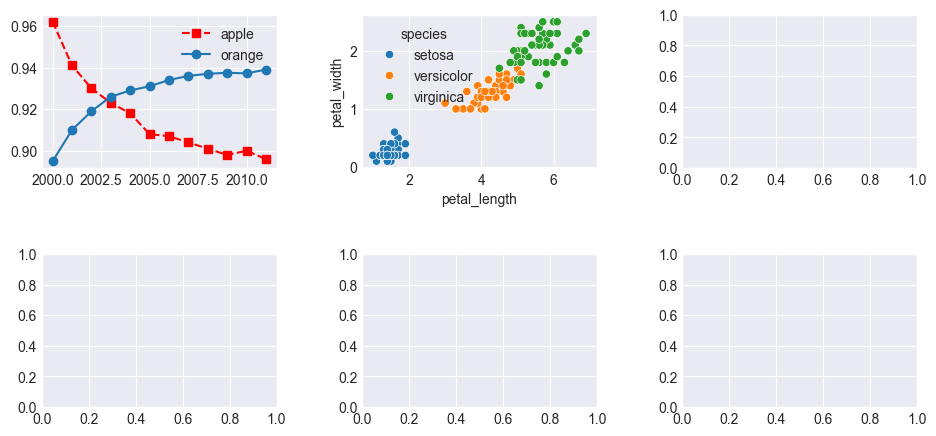

In [169]:
fig,axes=plt.subplots(2,3)

axes[0,0].plot(years,oranges,'s--r')
axes[0,0].plot(years,apples,'o-')
axes[0,0].legend(['apple','orange'])

# axes[0,1]
sns.scatterplot(x=flower.petal_length,y=flower.petal_width,hue=flower.species,ax=axes[0,1])

plt.tight_layout(pad=3)

In [154]:
axes 

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)